<a href="https://colab.research.google.com/github/martinbedia/mineria/blob/main/30oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 30 octubre

## Clustering

- Aprendizaje supervisado y no supervisado.
- Los clusters deben ser lo mas diferenciados y compactos posible.
- Conjuntos de forma esferica funcionan bien con k-means pero los otros no.
- Creo tantas variables dummy como categorias-1 haya.
- Es no deterministe, si lo ejecutamos dos veces pueden salir cosas  diferentes si los centros estan muy cerca.
- Validacion: cohesion y separacion

## k means

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
# importar el archivo usando pandas
df = pd.read_csv('clustering_ejemplo1.csv')
df


,variable_x,variable_y,grupo
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1
...,...,...,...
295,1.973698,1.579798,1
296,2.518342,1.391766,1
297,0.438990,4.535929,0
298,0.369479,7.791105,3


In [7]:
# utilizar to_numpy() sobre del DataFrame
# dividir el conjunto de datos en dos partes, para entrenar el modelo
x = df[['variable_x','variable_y']].to_numpy()
type(x)

numpy.ndarray

In [5]:
# se saca la variable de la informacion real de la etiqueta o grupo al que pertenece
grupos = df['grupo'].to_numpy()
grupos

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [6]:
import matplotlib.pyplot as plt

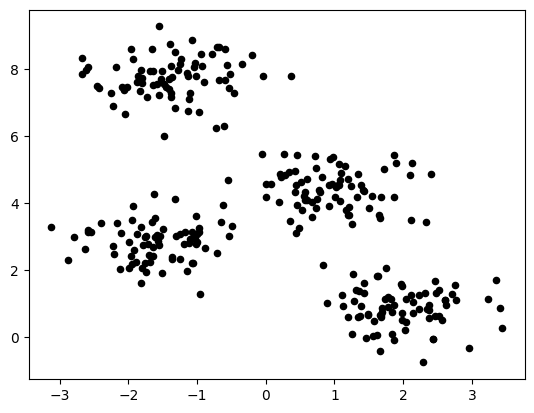

In [11]:
plt.scatter(x[:,0],x[:,1], c='black', s=20)    # c para color y s para el tamaño de los puntos
# plt.show()

Parece que hay cuatro clusters

In [53]:
# x es el conjunto de datos
# n_clusters es el valor de k, cuantos clusters queremos
# rseed valor de la semilla aleatoria

def crear_cluster(x,n_clusters,rseed):

  # 1. inicializar los clusters de forma aleatoria, hay que elegir n_clusters puntos que funcionen como centros en la primera iteracion
  rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
  i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
  centros = x[i]
  z=0  # iteraciones, vueltas que da el bucle

  # 2. realizar un bucle para la asignacion de objetos y actualizacion
  while True:
    z+=1
    # 2.1 asigno cada objeto al cluster mas cercano
    clusters = pairwise_distances_argmin(x,centros)

   # 2.2 calculo el nuevo centro del cluster
    nuevos_centros = np.array([x[clusters == i].mean(0) for i in range(n_clusters)])

   # 2.3 si no actualice los centros, salgo del bucle
    if np.all(centros == nuevos_centros):
     break
    centros = nuevos_centros

  return centros,clusters,z


In [19]:
from sklearn.metrics import pairwise_distances_argmin
pairwise_distances_argmin(x,centros)   #  para cada una de las filas de x cual es el centro al que tienen menor distancia

array([1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2,
       1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1,
       0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1])

In [36]:
# escribo y luego lo paso a la funcion de arriba
# inicializacion de los clusters
rseed = 5
n_clusters = 3

rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
centros = x[i]
centros

array([[-2.45809975,  7.51178724],
       [-1.86849125,  3.07982487],
       [ 2.40615694,  4.87047502]])

In [63]:
rseed = 3
n_clusters = 4
centros, clusters,z = crear_cluster(x,n_clusters,rseed)

In [64]:
crear_cluster(x,n_clusters,rseed)

(array([[-0.89247947,  8.18394342],
        [ 1.98726097,  0.90144281],
        [-0.33514647,  3.62624134],
        [-1.73102222,  7.43349916]]),
 array([1, 3, 2, 0, 1, 1, 2, 2, 0, 0, 2, 3, 2, 3, 1, 2, 2, 1, 2, 2, 1, 1,
        2, 2, 2, 2, 1, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 2,
        2, 2, 0, 2, 3, 1, 2, 1, 0, 1, 1, 2, 0, 2, 3, 1, 3, 2, 0, 2, 2, 2,
        3, 1, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
        3, 3, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 3, 2,
        2, 2, 1, 3, 1, 2, 3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
        2, 1, 3, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2,
        1, 2, 0, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0,
        1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 2, 2, 1, 2, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2,
        3, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2,
        1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1,

<function matplotlib.pyplot.show(close=None, block=None)>

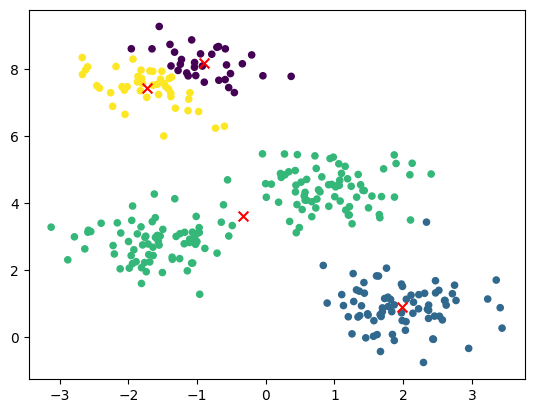

In [55]:
plt.scatter(x[:,0],x[:,1], c=clusters, s=20)
plt.scatter(centros[:,0],centros[:,1],c='red',marker='x',s=50)
plt.show

In [65]:
from sklearn.cluster import KMeans
n_clusters = 4
modelo = KMeans(n_clusters)
modelo

KMeans(n_clusters=4)